## Visualizing the Boston Housing Data

Now that we have seen some of the basic mechanics of `Matplotlib`, let's work with some actual data. For that, we are going to use the Boston Housing dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

In [2]:
# Matplotlib has some built in style sheets
mpl.style.use('fivethirtyeight')

In [3]:
boston = datasets.load_boston()

# Sklearn uses a dictionary like object to hold its datasets
X = boston['data']
y = boston['target']

feature_names = list(boston.feature_names)

In [102]:
# Some info about our data
# print(boston['DESCR'])

In [5]:
print(f'Dataset features contains {X.shape[0]} samples, and {X.shape[1]} data dimensions.')
print(f'Each of the {y.shape[0]} samples has an real valued label.')

Dataset features contains 506 samples, and 13 data dimensions.
Each of the 506 samples has an real valued label.


### What are These Data Features?

There are thirteen dimensions in this data. What types of 

In [6]:
# Take a look at the type of every *column* of our array
for idx, feature in enumerate(X.T):
    print(f'{feature_names[idx]} is of type {feature.dtype}')

CRIM is of type float64
ZN is of type float64
INDUS is of type float64
CHAS is of type float64
NOX is of type float64
RM is of type float64
AGE is of type float64
DIS is of type float64
RAD is of type float64
TAX is of type float64
PTRATIO is of type float64
B is of type float64
LSTAT is of type float64


### A Small Cheat

We haven't introduced the pandas library yet, but I am going to sneak it in here to give us a quick sense of our data.

In [103]:
X_df = pd.DataFrame(X)
X_df.columns = boston.feature_names
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### A Bird's Eye View

One of my first goto visualizations is the histogram. This will give us a quick visual check to see if there are outliers.

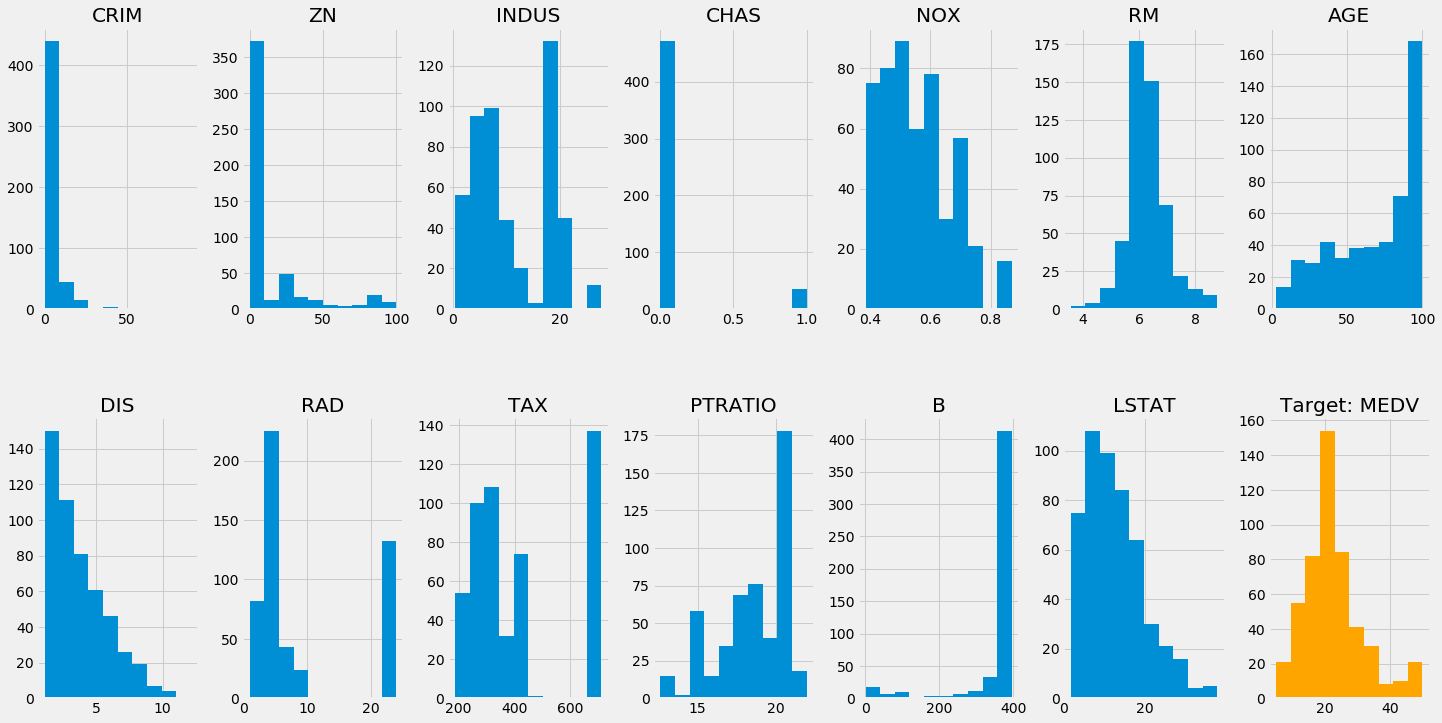

In [8]:
# Check out the distributions of our features
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for idx, feature in enumerate(X.T):
    axs[idx].hist(feature)
    axs[idx].set_title(f'{feature_names[idx]}')

# Since we have 2 rows each with 3 columns,
# and only 13 features, then we can visualize
# our target in the last `Axes` index.
axs[-1].hist(y, color='orange')
axs[-1].set_title(f'Target: MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

At first glance we can see that a few of these distributions are skewed. Though we haven't talked about machine learning algorithms yet, can you guess how important `Feature 3` is to our data? On one hand, I can imagine that a model might not be great at distinguishing the importance of this feature. Many of the samples have a low value for this feature, and it may be difficult to distinguish one sample from another given this feature. On the other hand, knowing that a sample has a high value for this feature might be informative.

### How Do These Features Relate to our Target?

Let's take a closer look at some of our features and how they relate to the median home value in Boston.

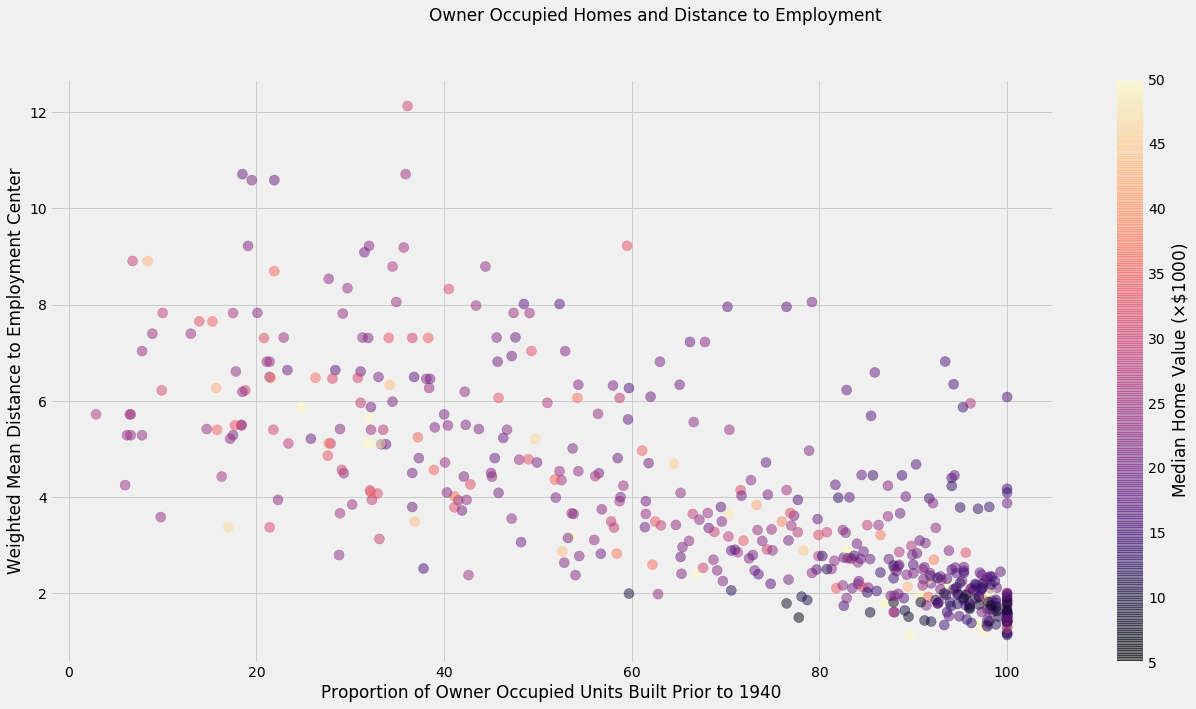

In [101]:
# Fancier example using the state machine approach
plt.figure(figsize=(20, 10))

plt.scatter(
    proportion_owner_occupied, 
    distances_to_employment, 
    s=100,        # keeping a uniform size for all points
    c=y,          # color the points by our target
    cmap='magma', # colormaps can make things easier to read
    alpha=0.5     # transparency for overlapping points
)

cbar = plt.colorbar()
cbar.set_label(r"Median Home Value ($\times \$1000$)")

plt.xlabel("Proportion of Owner Occupied Units Built Prior to 1940")
plt.ylabel("Weighted Mean Distance to Employment Center")
plt.suptitle("Owner Occupied Homes and Distance to Employment")
plt.show()